In [9]:
import random
import math

In [ ]:
################
#prey move
################
def movePrey(preyPos, graph):
  moves = [preyPos]
  for i in range(len(graph[preyPos])):
    if graph[preyPos][i]==1:
      moves.append(i)
  return random.choice(moves)

In [10]:
###################
#floyd warshall's - predator move 
###################
def floydWarshall(graph):
  dist = [[math.inf for i in range(len(graph[0]))]for j in range(len(graph))]
  # print(dist)
  path = [[i for i in range(V)] for j in range(V)]

  for i in range(len(graph)):
    dist[i][i] = 0

  for i in range(V):
    for j in range(V):
      if graph[i][j] == 1:
        dist[i][j] = 1
        path[i][j] = j
        path[j][i] = i


  for k in range(V):
    for i in range(V):
      for j in range(V):

        if dist[i][j] > dist[i][k] + dist[k][j]:
          dist[i][j] = dist[i][k] + dist[k][j]

          path[i][j] = k
          # path[k] = j
          path[j][i] = k
          # path[k] = i
          path[i][k] = k
          path[k][i] = i
          path[j][k] = k
          path[k][j] = j          
  
  # print("----------------path-----------------")
  # print(path)
  # print("-----------path over ----------------")
  return path,dist
  # printSolution(dist)







In [ ]:
def getNeighbours(graph, start):
  neighbours = []

  for index, elem in enumerate(graph[start]):
    if elem == 1:
      neighbours.append(index)
  
  return neighbours

In [ ]:
def movePredator(predPos, agentPos, path):
    return path[predPos][agentPos]

In [ ]:
def getNeighbours(graph, start):
  neighbours = []

  for index, elem in enumerate(graph[start]):
    if elem == 1:
      neighbours.append(index)
  
  return neighbours

def movePredator(predPos, agentPos, path):
    return path[predPos][agentPos]

def agent1Modified(agentPos, preyPos, predPos, graph, dist, path, runs=100):
    
    while(runs > 0):
        if agentPos == predPos:
            return False, 2

        if agentPos == preyPos:
            return True, 0

        # move agent
        agentPos = moveAgent1(agentPos, preyPos, predPos, graph, dist)

        
        
        # check pred
        if agentPos == predPos:
            return False, 2

        # check prey
        if agentPos == preyPos:
            return True, 0

        # move prey
        preyPos = movePrey(preyPos, graph)

        if agentPos == preyPos:
            return True, 0

        # move predator
        predPos = movePredator(predPos, agentPos, path)







        runs -= 1
    
    return False, 4

In [5]:
################
#graph structure
################
import matplotlib.pyplot as plt
import networkx as nx
import random
V = 8
INF = 99999
degree=[2 for i in range(V)]
graph =[[0 for i in range(V)]for j in range(V)]
for i  in range(V):
  graph[i%V][(i+1)%V]=1
  graph[(i+1)%V][i%V]=1
# print(graph,"before")
for i in range(V):
  if(degree[i]==2):
    deg2List=[]
    for j in range(i-5,i+6):
      if( i != j and i != j%V and i != (j+1)%V and i != (j-1) % V and degree[j%V]==2):
        deg2List.append(j%V)
    
    deg2List = list(set(deg2List))
    if(len(deg2List)!=0):
      randomEdgeIndex=random.randint(0,len(deg2List)-1)
      randomEdge=deg2List[randomEdgeIndex]
      # print(i,randomEdgeIndex,randomEdge,"test")
      degree[i]+=1
      degree[randomEdge]+=1
      graph[i][randomEdge]=1
      graph[randomEdge][i]=1

# print(degree)   
# print(graph)
path=[]
dist=[]
# path,dist=floydWarshall(graph)

# print(path,"\n",dist)
G = nx.florentine_families_graph()
adjacency_matrix = nx.adjacency_matrix(G)

# The actual work
# You may prefer `nx.from_numpy_matrix`.
G2 = nx.from_scipy_sparse_matrix(adjacency_matrix)
nx.draw_circular(G2)
plt.axis('equal')

C:\Users\lokik\AppData\Local\Temp\ipykernel_34996\4179583477.py:40: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(G)


AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

In [81]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx



G = nx.cycle_graph(50)



In [82]:
print(G.edges(data=True))

[(0, 1, {}), (0, 49, {}), (1, 2, {}), (2, 3, {}), (3, 4, {}), (4, 5, {}), (5, 6, {}), (6, 7, {}), (7, 8, {}), (8, 9, {}), (9, 10, {}), (10, 11, {}), (11, 12, {}), (12, 13, {}), (13, 14, {}), (14, 15, {}), (15, 16, {}), (16, 17, {}), (17, 18, {}), (18, 19, {}), (19, 20, {}), (20, 21, {}), (21, 22, {}), (22, 23, {}), (23, 24, {}), (24, 25, {}), (25, 26, {}), (26, 27, {}), (27, 28, {}), (28, 29, {}), (29, 30, {}), (30, 31, {}), (31, 32, {}), (32, 33, {}), (33, 34, {}), (34, 35, {}), (35, 36, {}), (36, 37, {}), (37, 38, {}), (38, 39, {}), (39, 40, {}), (40, 41, {}), (41, 42, {}), (42, 43, {}), (43, 44, {}), (44, 45, {}), (45, 46, {}), (46, 47, {}), (47, 48, {}), (48, 49, {})]


In [75]:
for i in range(len(graph)):
    for j in range(len(graph[0])):
        if graph[i][j] == 1:
            G.add_edge(i, j, weight = dist[i][j])

In [77]:
print(G.edges(data=True))

[(0, 1, {'weight': 1}), (0, 49, {'weight': 1}), (0, 48, {'weight': 1}), (1, 2, {'weight': 1}), (1, 47, {'weight': 1}), (2, 3, {'weight': 1}), (2, 6, {'weight': 1}), (3, 4, {'weight': 1}), (3, 7, {'weight': 1}), (4, 5, {'weight': 1}), (4, 49, {'weight': 1}), (5, 6, {'weight': 1}), (5, 8, {'weight': 1}), (6, 7, {'weight': 1}), (7, 8, {'weight': 1}), (8, 9, {'weight': 1}), (9, 10, {'weight': 1}), (9, 14, {'weight': 1}), (10, 11, {'weight': 1}), (10, 15, {'weight': 1}), (11, 12, {'weight': 1}), (11, 16, {'weight': 1}), (12, 13, {'weight': 1}), (12, 17, {'weight': 1}), (13, 14, {'weight': 1}), (13, 18, {'weight': 1}), (14, 15, {'weight': 1}), (15, 16, {'weight': 1}), (16, 17, {'weight': 1}), (17, 18, {'weight': 1}), (18, 19, {'weight': 1}), (19, 20, {'weight': 1}), (19, 23, {'weight': 1}), (20, 21, {'weight': 1}), (20, 22, {'weight': 1}), (21, 22, {'weight': 1}), (21, 26, {'weight': 1}), (22, 23, {'weight': 1}), (23, 24, {'weight': 1}), (24, 25, {'weight': 1}), (24, 27, {'weight': 1}), (25,

(0, 1, {})


KeyError: 'weight'

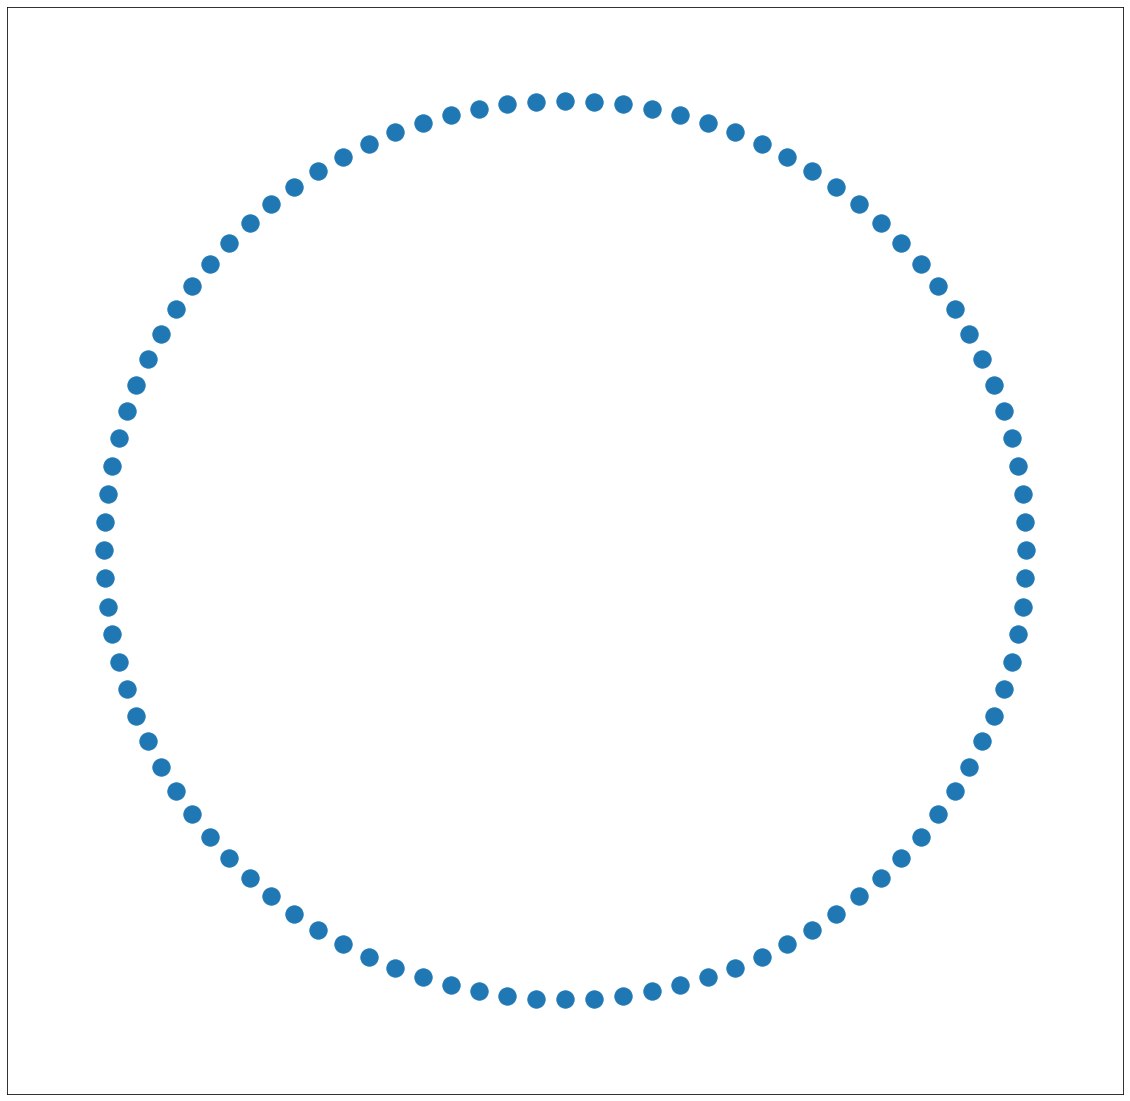

In [69]:
pos = nx.circular_layout(G)  # positions for all nodes

ax = plt.gca()

ax1=plt.gcf()
ax1.set_size_inches(20, 20)
# nodes
sc = nx.draw_networkx_nodes(G, pos, node_size=300)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=0)

for edge in G.edges(data=True):
    print(edge)
    source, target, radius = edge
    arrowprops=dict(arrowstyle="-",
                    color='blue',
                    connectionstyle=f"arc3,rad={0.5*radius['weight']}",
                    linestyle= '-',
                    alpha=0.6,)
    ax.annotate("",
                xy=pos[source],
                xytext=pos[target],
                arrowprops=arrowprops
               )

nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
plt.show()